# EE 538: Low-Noise Analog Circuit Design
## Spring 2021
## Instructor: Jason Silver

## Announcements

 - Assignment 2 due Sunday, April 18 at midnight
 - Assignment 3 will be posted Saturday, April 24

## Week 3

 - Motchenbacher Chapter 4
 - Art of Electronics Chapter 8

## Overview

 - Last time...
     - 2-port noise theory
     - Noise figure/noise factor
     - Amplifier noise model
     - Feedback amplifier noise analysis
 - Today
     - Hybrid-$\pi$ model
     - BJT noise model
     - BJT noise figure

## Python packages/modules

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
import numpy as np
from scipy import signal
from scipy import integrate
#%matplotlib notebook

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_log3xy(x, y1, y2, y3, xlabel, ylabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(figsize=(10.0,7.5))
    
    ax.semilogx(x, y1, 'b', label=y1label)
    ax.semilogx(x, y2, 'r', label=y2label)
    ax.semilogx(x, y3, 'g', label=y3label)  
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.grid()    
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/ vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()

def plot_NF_vs_Rs(en_vals, in_vals, Rs_min, Rs_max, T_in_K):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    F1 = 1 + (en_vals[0]**2+Rs**2*in_vals[0]**2)/(4*k*T_in_K*Rs)
    F2 = 1 + (en_vals[1]**2+Rs**2*in_vals[1]**2)/(4*k*T_in_K*Rs)
    F3 = 1 + (en_vals[2]**2+Rs**2*in_vals[2]**2)/(4*k*T_in_K*Rs)
    ax.semilogx(Rs, 10*np.log10(F1), 'b', label=r'$e_{n1}$, $i_{n1}$')
    ax.semilogx(Rs, 10*np.log10(F2), 'r', label=r'$e_{n2}$, $i_{n2}$')
    ax.semilogx(Rs, 10*np.log10(F3), 'g', label=r'$e_{n3}$, $i_{n3}$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Noise Figure $NF$ [$dB$]')  
    
    ax.legend()
    ax.legend(loc='upper center', ncol=3, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )  
    
def plot_noise_curve(e_n, i_n, Rs_min, Rs_max):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    Rs = np.logspace(np.log10(Rs_min), np.log10(Rs_max), num=200)
    e_ni_2 = 4*k*T*Rs + e_n**2 + i_n**2*Rs**2
    ax.loglog(Rs, np.sqrt(e_ni_2), 'b', label='Total Noise')
    ax.loglog(Rs, np.sqrt(4*k*T*Rs), 'r', label=r'$\sqrt{4kTR_s}$')
    ax.loglog(Rs, e_n*np.ones(np.size(Rs)), 'g', label=r'$e_n$')
    ax.loglog(Rs, i_n*Rs, 'y', label=r'$i_n R_s$')
    ax.grid();
    ax.set_xlabel(r'Source Resistance $R_s [\Omega]$')
    ax.set_ylabel(r'Equivalent Input Noise [$V/\sqrt{Hz}$]')
    
    ax.legend()
    ax.legend(loc='upper center', ncol=4, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.13) )   
    
def plot_bjt_NF(beta, r_bb, Rmin, Rmax, Imin, Imax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    k = 1.38e-23
    T = 300
    q = 1.602e-19
    V_T = k*T/q
    rs = np.logspace(np.log10(Rmin), np.log10(Rmax), num = 100)
    ic = np.logspace(np.log10(Imin), np.log10(Imax), num = 100)
    I_C, R_S = np.meshgrid(ic, rs)
    e_n_2 = 4*k*T*(V_T/2/I_C + r_bb)
    i_n_2 = 2*q*I_C/beta_0
    NF = 1 + (e_n_2 + i_n_2*R_S**2)/(4*k*T*R_S)
    cp = ax.contourf(I_C, R_S, 10*np.log10(NF), levels=np.linspace(0,15, num=16))
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'Source Resistance $R_s$ [$\Omega$]')
    plt.xlabel(r'Collector Current $I_C$ [A]')
    fig.colorbar(cp)

In [9]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 3 - Noise in Bipolar Junction Transistors

## BJT operation (npn)

<center><img src="img/npn_current.png" width=700 /></center>

- $V_{be}$ controls the potential barrier for electrons trying to diffuse into the base region
- For $V_{be} > 0$ (forward bias), electrons diffuse from (are emitted by) the emitter into base
- The electric field generated by $V_{cb}$ causes electrons to be swept across the collector-base diffusion region

## Large-signal model (Ebers-Moll)

<center><img src="img/NPN_transistor.png" width=300 /></center>

$$I_c = I_S\left(1+\dfrac{V_{ce}}{V_A}\right)e^{V_{be}/V_T} $$

\begin{align} I_b = I_c/\beta && I_e = I_b + I_c
\end{align}

$$ V_{be} = \dfrac{kT}{q}ln\left(\dfrac{I_c}{I_S}+1\right) $$

 - In active mode, collector current ($I_c$) is an exponential function of $V_{be}$ and (secondarily) a linear function of $V_{ce}$
 - Base current ($I_b$) is smaller than $I_c$ by a factor $\beta$, which is typically in the range of 10 to several hundred at DC
 - A large value of $\beta$ is desirable to minimize loading at the base of the BJT (among other reasons, including low noise)
 - If $I_c$ is held constant, $V_{be}$ is a logarithmic function of $I_c$

## Hybrid-pi model

<center><img src="img/BJT_hybrid_pi.png" width=700 /></center>

\begin{equation}
g_m \equiv \dfrac{\partial I_C}{\partial V_{BE}} = \dfrac{qI_C}{kT} = \dfrac{I_C}{V_T} 
\end{equation}

\begin{equation}
r_o \equiv \dfrac{\partial V_{CE}}{\partial I_C} = \dfrac{V_A}{I_C}
\end{equation}

\begin{equation}
r_\pi = \beta_0 \dfrac{V_T}{I_C} = \dfrac{\beta_0}{g_m}
\end{equation}

 - The transconductance $g_m$ is the derivative of collector current with respect to base-emitter voltage

 - $r_o$ is the small-signal output resistance of the transistor which captures the dependence of $i_c$ on $v_{ce}$
 
 - $r_\pi$ is a small-signal resistance that represents the dependence of $i_b$ on $v_\pi$
 
 - $r_{b}$ is the so-called "spreading resistance" of the base, and is a real resistance
 
 - $r_\mu$ is a small-signal resistance that models the dependece of $i_b$ on $v_{ce}$ ($r_\mu \geq \beta_0 r_o$)
 
 - In addition to these parameters, we also often utilize $r_e$, the small-signal resistance "looking into" the emitter ($r_e \equiv 1/g_m = V_T/I_C$)
 

## BJT capacitances

<center><img src="img/BJT_hybrid_pi.png" width=700 /></center>

\begin{equation}
C_\mu = \dfrac{1}{\left(1 - \dfrac{V_{BC}}{\Phi_o}\right)}
\end{equation}

\begin{equation}
C_\pi = C_j + C_b \approx \tau_F g_m
\end{equation}

 - The hybrid-$\pi$ model contains two small-signal capacitances, $C_\pi$ and $C_\mu$
 
 - $C_\mu$ reresents the depletion capacitance of the base-collector junction
 
 - $C_\pi$ contains both a junction capacitance ($C_{j}$) and the so-called "base-charging" capacitance ($C_b$), which depends on the average time (per charge carrier) spent crossing the base region
 
 - Depending on whether the BJT is integrated or discrete, $C_\pi$ is typically an order of magnitude (or more) greater than $C_\mu$

## BJT transit frequency

<center><img src="img/BJT_ft.png" width=500 /></center>

 - The BJT gain-bandwidth product (or, equivalently, transit frequency $f_T$) is defined as the frequency at which the short-circuit current gain is equal to one:
 
\begin{equation}
f_T = \dfrac{g_m}{2\pi \cdot (C_\pi + C_\mu)}
\end{equation}

 - $f_T$ constitutes the maximum frequency at which the transistor is able to provide power gain - beyond this frequency, it loses its utility as a gain device
 
 - $f_T$ essentially captures the reduction in $\beta$ as a function of frequency $-$ i.e. it is the frequency at which $|\beta(f)| = 1$ 
 
 - As predicted by the expression, $f_T$ generally increases with $I_C$ (though at high values of $I_C$ $f_T$ begins to lower due to a decrease in $\tau_F$)

 - We can plot the dependence of current gain $\beta$ on frequency if we know the DC current gain $\beta_0$ and the transit frequency $f_T$ (both of which are typically specified in transistor datasheets)

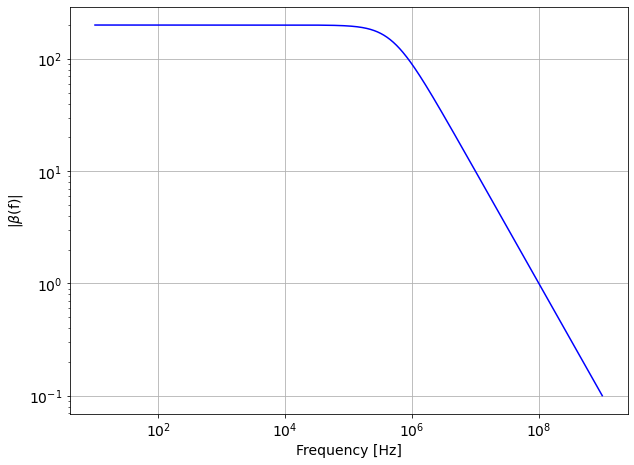

In [10]:
beta_0 = 200
f_t = 100e6
f_3dB = f_t/beta_0
f = np.logspace(1, 9, num=800)
beta_f = beta_0/np.sqrt(1+f**2/f_3dB**2)
plot_loglog(f, beta_f, 'Frequency [Hz]', r'|$\beta$(f)|')

## BJT noise mechanisms

<center><img src="img/BJT_parasitics.png" width=800 /></center>

 - Electrons injected into the base region from the emitter do so at random times, independent of each other, resulting in shot noise that is dependent on $I_C$
 
 - Similarly, electrons swept across the base-collector junction are subject to random shot noise, which in this case is dependent on $I_B$
 
 - $r_b$ is the resistance of the base semiconductor material, and thus exhibits thermal noise
 
 - *Figure source: Analysis and Design of Analog Integrated Circuits, Fifth Edition*

## BJT noise model

<center><img src="img/BJT_noise_model.png" width=1000 /></center>

 - The BJT noise model contains a single voltage noise source due to $r_b$

\begin{equation}
e_{b}^2 = 4kTr_{b}
\end{equation}

 - In addition, there are both shot and $1/f$ current noise generators
 
\begin{equation}
 i_{nc}^2 = 2qI_C \;\;\;\; i_{nb}^2 = 2qI_B = 2q\dfrac{I_C}{\beta_0} \;\;\;\;   i_{nf}^2 = \dfrac{KI_B^\gamma}{f^\alpha}
\end{equation}

 - $\gamma$ is typically in the range of $1$ to $2$, while $\alpha$ is generally close to unity
 
 - Neither $r_\pi$ nor $r_o$ produces thermal noise, as they small-signal resistances (as opposed to actual resistances)

## Equivalent input voltage noise

 - Thermal noise due to $r_{b}$ is an intrinsic noise voltage given by $e_{b}^2 = 4kTr_{b}$
 
 - Collector current shot noise is referred to the base of the transistor by dividing by the transconductance $g_m$
 
\begin{equation}
e_{nc}^2 = i_{nc}^2\cdot \dfrac{1}{g_m^2} = 2qI_C \left(\dfrac{V_T}{I_C}\right)^2 = 2qI_Cr_e^2
\end{equation}

 - The equivalent voltage noise is given by

\begin{equation}
e_n^2 =  2qI_Cr_e^2 + 4kTr_{b} \:\: V^2/Hz
\end{equation}

 - The combination can be expressed as Johnson noise arising from two separate resistances, $r_{b}$ and $r_e/2$
 
\begin{equation}
e_n^2 =  2qI_Cr_e^2 + 4kTr_{b} = 4kT\left( \dfrac{r_e}{2} + r_{b} \right) \:\: V^2/Hz
\end{equation}

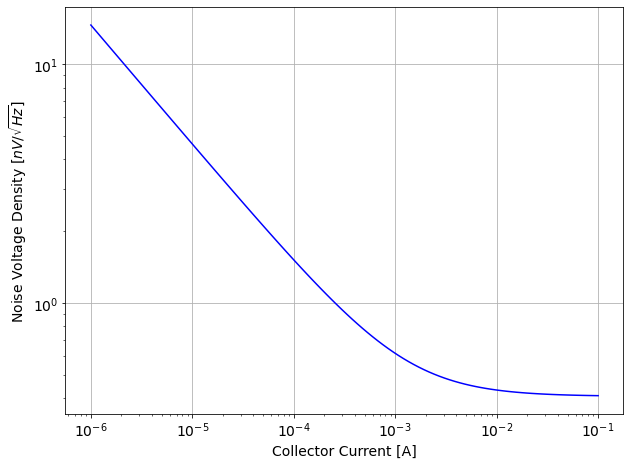

In [11]:
r_b = 10
beta_0 = 200
k = 1.38e-23
T = 300
q = 1.602e-19
V_T = k*T/q
I_C = np.logspace(-6, -1, num = 100)
e_n_2 = 4*k*T*(V_T/2/I_C + r_b)
plot_loglog(I_C, 1e9*np.sqrt(e_n_2), r'Collector Current [A]', r'Noise Voltage Density [$nV/\sqrt{Hz}$]')

 - At low values of $I_C$, the voltage noise is "shot-noise-limted," and the noise due to $r_{b}$ has little effect
 
 - As $I_C$ is increased, $r_{b}$'s noise eventually dominates, requiring a lower value of $r_{b}$ to further reduce noise

## Minimizing voltage noise

<center><img src="img/AoE_BJT_en_vs_rbb.png" width=700 /></center>

 - For very low collector currents (i.e. $< 1mA$), the value of $r_{b}$ has much less of an impact on the input voltage noise due to the dominance of collector current shot noise
 
 - To minimize voltage noise, we need both an increase in collector current and an decrease in $r_{b}$
 
 - Note that, dependence on the source resistance, this may not necessarily align with the goal of a low noise figure
 
 - *Figure source: Art of Electronics, Third Edition*

<center><img src="img/uncorrelated_noise_currents.png" width=700 /></center>

 - The improvement of $e_n$ with increasing $I_C$ is an intrinsic feature of shot noise, and is common to various noise processes
 
 - Essentially, the *signal* current increases linearly with $I_C$ (due to the commensurate increase in $g_m$), while the *noise* current goes up as $\sqrt{I_C}$
 
 - This is due to the fact that while the signal currents are $100\%$ correlated, the noise currents are not

## Input-referred noise

<center><img src="img/bjt_input_referred_noise.png" width=900 /></center>

 - We typically refer various noise sources, regardless of origin, to the input (in this case, the base of the BJT) for comparison with other noise sources, including that due to the source resistance
 
 - In doing so, we need to divide by the device gain, which in this case the the transconductance of the BJT, $g_m$
 
 - The equivalent noise voltage is given by
 
\begin{equation}
e_{nc} = \dfrac{i_{nc}}{g_m} = \dfrac{\sqrt{2qI_C}}{g_m} 
\end{equation}
 

## Equivalent input current noise

 - Two current noise generators are associated with the base, one due to shot noise and another with a $1/f$ characteristic

\begin{equation}
i_{nb}^2 = 2qI_B \;\;\;\; i_{nf}^2 = \dfrac{KI_B^\gamma}{f^\alpha}
\end{equation}
 
 - The base current shot noise is typically expressed in reference to the collector current, such that $i_{nb}^2 = 2qI_C/\beta_0$
 
 - At high frequencies, collector current shot noise flows through $C_{\mu}$, contributing an additional frequency-dependent noise current given by
 
\begin{equation}
i_{nc,b}^2 = 2qI_C\left(\dfrac{f}{f_T}\right)^2
\end{equation}

 - The equivalent input noise current is thus
 
\begin{equation}
i_{n}^2 = 2q\dfrac{I_C}{\beta_0} + \dfrac{KI_B^\gamma}{f^\alpha} + 2qI_C\left(\dfrac{f}{f_T}\right)^2
\end{equation}

## BJT 1/f noise 

 - $1/f$ noise is a process-dependent noise mechanism that arises due to construction defects, often at material interfaces
 
 - In BJTs $1/f$ noise is generally visible only at very low frequencies or high collector currents. It is expressed as
 
\begin{equation}
i_{nf}^2 = \dfrac{KI_B^\gamma}{f^\alpha}
\end{equation}

 - $\gamma$ is typically between $1$ and $2$, and $\alpha$ is usually assumed to be unity
 
 - Letting $\alpha = 1$ and $f_{ci} = KI_B^{\gamma - 1}/2q$ the base current noise can be expressed as
 
\begin{equation}
i_{n}^2 = 2qI_B\left(1 + \dfrac{f_{ci}}{f}\right) + 2qI_C\left(\dfrac{f}{f_T}\right)^2 = 2q\dfrac{I_C}{\beta_0}\left(1 + \dfrac{f_{ci}}{f}\right) + 2qI_C\left(\dfrac{f}{f_T}\right)^2
\end{equation}

 - $f_{ci}$ represents the $1/f$ noise corner frequency, which increases with current as $I_B^{\gamma - 1}$ and is typically in the range of $10$'s of $\text{Hz}$ to several $\text{kHz}$


## Induced voltage noise

 - Recall that the input current noise can be expressed as the sum of one component that is correlated with $e_n$ and another that is not. Expressing this concept in terms of voltage noise, we have
 
\begin{equation}
e_n = e_u + e_c = e_u + Z_c i_n
\end{equation}

 - As the base noise current (both shot and $1/f$ components) flows through $r_{b}$ it produces a voltage noise that is correlated with $i_n$
 
\begin{equation}
e_{c}^2 = i_n^2r_b^2  = 2q\dfrac{I_C}{\beta_0}\left(1+\dfrac{f_{ci}}{f}\right)r_{b}^{2} + 2qI_C\left(\dfrac{f}{f_T}\right)^2r_{b}^2
\end{equation}

 - The total input-referred voltage noise is thus
 
\begin{equation}
e_n^2 = e_u^2 +  i_n^2 r_b^2 = 4kT\left( \dfrac{r_e}{2} + r_{b} \right) + 2q\dfrac{I_C}{\beta_0}\left(1+\dfrac{f_{ci}}{f}\right)r_{b}^{2} + 2qI_C\left(\dfrac{f}{f_T}\right)^2r_{b}^2
\end{equation}

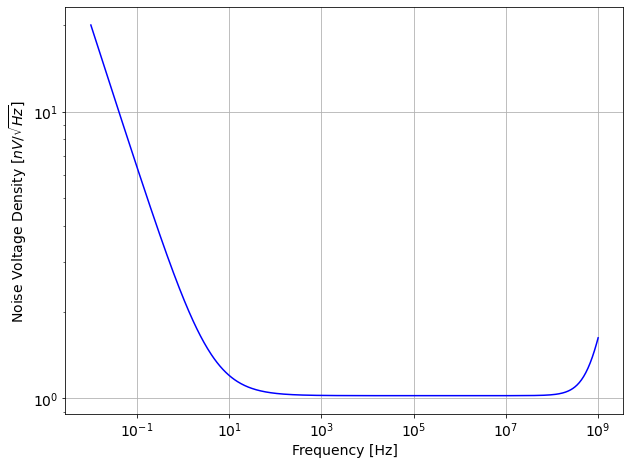

In [12]:
r_b = 50
beta_0 = 200
kT = 1.38e-23*300
q = 1.602e-19
V_T = kT/q
I_C = 1e-3
f_ci = 1e3
f_t = 100e6
f = np.logspace(-2, 9, num=700)
e_n_2 = 4*k*T*(V_T/2/I_C + r_b) + + 2*q*(I_C/beta_0)*r_b**2*(1+f_ci/f)+ 2*q*I_C*r_b*(f/f_t)**2
plot_loglog(f, 1e9*np.sqrt(e_n_2), r'Frequency [Hz]', r'Noise Voltage Density [$nV/\sqrt{Hz}$]')

 - The flat portion of the noise corresponds to the noise due to $r_b$, $i_{nb}$, and $i_{nc}$ (component referred through $g_m$))
 
 - With the inclusion of the induced voltage noise, the resulting noise exhibits frequency dependence at both low and high frequencies due to $1/f$ noise and collector current shot noise passing through $C_\mu$

## Equivalent noise model

<center><img src="img/BJT_input_noise.png" width=600 /></center>

 - Equivalent voltage noise:
 
\begin{equation}
e_n^2 = 4kTr_{b} + 2qI_Cr_e^2 + \dfrac{2qI_C}{\beta_0}r_{b}^{2}\left(1+\dfrac{f_{ci}}{f}\right) + 2qI_Cr_{b}^2\left(\dfrac{f}{f_T}\right)^2
\end{equation}

 - Equivalent current noise:
 
\begin{equation}
i_n^2 =2q\dfrac{I_C}{\beta_0}\left(1 + \dfrac{f_{ci}}{f}\right)+2qI_C\left(\dfrac{f}{f_T}\right)^2
\end{equation}
 
 

 - In many cases a simplified noise model is adequate for describing the transistor's noise performance
 
 - $r_b$ is typically much smaller than $\beta_0 r_e$, generally allowing us to ignore the voltage noise due to $i_{nc}$
 
 - Further, assuming we are primarily interested in "midband" frequencies such that $f_{ci} << f << f_{T}$, we can ignore the $1/f$ and "direct" shot-noise current components and the noise model becomes
 
\begin{equation}
e_n^2 = 4kTr_{b} + 2qI_Cr_e^2
\end{equation}

\begin{equation}
i_n^2 =2q\dfrac{I_C}{\beta_0}
\end{equation}
 

## BJT noise factor

 - As previously discussed, the optimum (minimum) noise factor is given by
 
\begin{equation}
F_{opt} = 1 + \dfrac{e_n^2 + R_{opt}^2 i_n^2}{4kT R_{opt}\Delta f} = 1 + \dfrac{2 e_n^2}{4kT \Delta f e_n/i_n} = 1 + \dfrac{e_n\cdot i_n}{2kT\Delta f}
\end{equation}

 - where $R_{opt} = e_n/i_n$ is the source resistance that gives the optimum noise factor
 
 - Neglecting $1/f$ noise (which is typically only a concern at very low frequencies), we can express $F_{opt}$ in terms of small-signal BJT parameters:
 
\begin{equation}
F_{opt} =  1 + \dfrac{\sqrt{4kT\left(r_{b} + \dfrac{r_e}{2} \right)\cdot \dfrac{2kT}{\beta_0 r_e }}}{2kT\Delta f} = 1+ \sqrt{\dfrac{2r_{b}}{\beta_0}\cdot\dfrac{I_C}{V_T} + \dfrac{1}{\beta_0}}
\end{equation}

 - From this expression we can see that increasing $\beta_0$ or lowering $r_{b}$, $I_C$ reduces the minimum noise factor
 
 - The lowest noise factor is realized at low collector currents when the BJT is "shot-noise-limited"

## However...

 - Does the preceding result mean that for low-noise amplification we should operate our input-stage BJT with a low collector current?
 
 - Recall that the optimum source resistance corresponding to the minimum noise factor is given by $R_{opt} = e_n/i_n$. Expressed in terms of $e_n$ and $i_n$ of the BJT, this becomes
 
\begin{equation}
R_{opt} = \dfrac{e_n}{i_n} = \sqrt{\dfrac{4kT\left(r_{b} + \dfrac{r_e}{2}\right)}{2kT/\beta_0r_e}} = \sqrt{\beta_0 r_{b}\cdot\dfrac{2V_T}{I_C} + \dfrac{\beta_0 V_T^2}{I_C^2} }
\end{equation}

 - In the shot-noise-limited regime this becomes
 
\begin{equation}
R_{opt} \approx \dfrac{V_T}{I_C}\sqrt{\beta_0}
\end{equation}

 - This means that to operate at $F_{opt}$, $R_{opt}$ should become increasingly large (a condition that will not be possible to satisfy for many applications)

 - We can assess the noise factor graphically as a function of collector current and source resistance

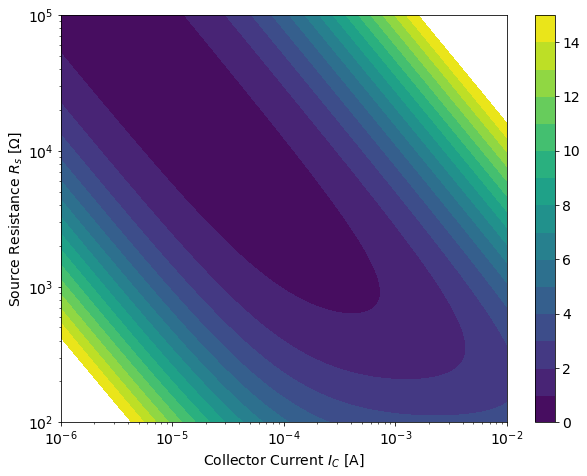

In [13]:
r_b = 100
beta_0 = 100
plot_bjt_NF(beta_0, r_b, 100, 1e5, 1e-6, 10e-3)

 - For moderate values of $R_s$ (~$1k\Omega$), the optimal value of $I_C$ is close to $1mA$ 

## Common-emitter stage

<center><img src="img/CE_noise_analysis.png" width=700 /></center>

 - Johnson noise from $R_{B1,2}$ is heavily filtered due to $C_{AC}$
 
 - $R_E$ is used for biasing, but it is bypassed with $C_{AC2}$ (which can be considered an AC short at signal frequencies) for high gain and reduced noise 
 
 - Primary noise contributors are $R_C$ and the transistor
 
 - What is the input-referred noise in the signal band (e.g. at audio frequencies)?

<center><img src="img/CE_noise_model.png" width=1000 /></center>

 - $R_C$'s current noise appears in parallel with the transistor's collector shot noise, and can be input-referred via $g_{m}$  
 
 - The (midband) input-referred voltage density can be expressed as
 
\begin{equation}
e_n^2 = 4kT\left(r_{b} + \dfrac{r_e}{2} + \dfrac{r_e^2}{R_C}\right) = 4kT\left(r_{b} + \dfrac{1}{2g_m} + \dfrac{1}{g_m^2R_C}\right)
\end{equation}

 - Assuming we want high gain ($g_mR_C >> 1$), transistor shot noise will dominate over $R_C$'s thermal noise

 - The equivalent current-noise density is the same as that of the BJT alone:
 
\begin{equation}
i_n^2 =2q\dfrac{I_C}{\beta_0} 
\end{equation}


## Emitter-degeneration

<center><img src="img/CE_degeneration_noise.png" width=500 /></center>

 - What happens to the noise performance if we remove $C_{AC2}$?
  
 - Assuming $g_mR_E >> 1$, $R_E$'s current noise is added to the total output noise current as 
 
\begin{equation}
i_{nR_E,out} = \sqrt{\dfrac{4kT}{R_E}}\cdot\dfrac{R_E}{1/g_m + R_E} \approx \sqrt{\dfrac{4kT}{R_E}}
\end{equation}

 - $R_C$'s noise current flows directly to the output
 
 - Assuming $g_mR_E >> 1$, the effective transconductance, reduced by negative feedback, is given by
 
\begin{equation}
G_m \equiv \dfrac{i_{out}}{v_b} = \dfrac{g_m}{1+g_mR_E}
\end{equation}

 - A fraction of the collector shot noise current flows through $R_E$, resulting in a noise voltage at $v_e$ given by
 
\begin{equation}
v_e = \dfrac{i_{nc}R_E}{1+g_mR_E} 
\end{equation}

 - This causes a noise current to flow in the transistor given by

\begin{equation} 
-g_mv_e = -g_m\cdot \dfrac{i_{nc}R_E}{1+g_mR_E}
\end{equation}

 - The output noise current due to the transistor is thus
 
\begin{equation}
i_{nc,out} = i_{nc} - g_m\cdot \dfrac{i_{nc}R_E}{1+g_mR_E} = \dfrac{i_{nc}}{1+g_m R_E}
\end{equation}
 
 - This noise current approaches zero as $g_m R_E >> 1$

 - The reduction in current noise due to degeneration is a useful property in current mirrors and differential amplifiers, allowing a reduction in transistor noise for a given collector current
 
 - In comparing $R_E$'s noise to collector shot noise (again assuming $g_m R_E >> 1$), we can use the equivalent thermal noise expression
 
\begin{equation}
i_{nc} = 2qI_C = 2q g_m \dfrac{kT}{q} = 2kTg_m = \dfrac{4kT}{r_e/2} >> \dfrac{4kT}{R_E}
\end{equation}

 - Thus, the inclusion of $R_E$ proves beneficial in reducting output current noise
 
 - The input-referred voltage noise, on the other hand, remains unchanged
 
\begin{equation}
$e_{nc} = \dfrac{i_{nc,out}}{G_m} = \dfrac{i_{nc}}{1+g_m R_E}\cdot \dfrac{1+g_mR_E}{g_m} = \dfrac{i_{nc}}{g_m}
\end{equation}

## Summary

 - The BJT noise model consists of thermal, shot, and $1/f$ noise sources
 
 - BJT voltage noise $e_n$ is primarily due to $r_b$ and collector current shot noise (which is input-referred via $g_m$)
 
 - Minimization of $e_n$ requires both an increase in $I_C$ and a small value of $r_b$
 
 - BJT current noise $i_n$ is dominated by base current shot noise, which increases with collector current and decreases for larger values of $\beta$
 
 - Optimizing the BJT's noise factor requires operation in the shot-noise-limited regime, though this generally involves high values of source resistance
 
 - Noise in a common-emitter amplifier is dominated by transistor noise ($R_C$ noise has little effect if designed for high gain)
 
 - Emitter degeneration supresses collector current shot noise in current sources, but does not affect the input-referred voltage noise